In [3]:
from google.colab import files
uploaded = files.upload()  # Choose "global_superstore.csv.xlsx"



Saving global_superstore.csv.xlsx to global_superstore.csv.xlsx


In [4]:
import pandas as pd

# Replace with your file name exactly as uploaded
df = pd.read_excel("global_superstore.csv.xlsx")

# Show first few rows to verify
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


##Create SQLite database and insert data

In [6]:
# Drop old table if it exists
cur.execute("DROP TABLE IF EXISTS sales")

# Create table matching the Excel column names
cur.execute("""
CREATE TABLE sales (
    `Order ID` TEXT,
    `Order Date` TEXT,
    `Quantity` INTEGER,
    `Sales` REAL,
    `Product Name` TEXT
)
""")

# Insert directly from DataFrame without renaming
df[["Order ID", "Order Date", "Quantity", "Sales", "Product Name"]].to_sql(
    "sales", conn, if_exists="append", index=False
)

print("✅ Data inserted into SQLite!")


✅ Data inserted into SQLite!


In [8]:
import pandas as pd

# Read Excel
df = pd.read_excel("/content/global_superstore.csv.xlsx")

# See first rows and exact column names
print(df.head())
print(df.columns.tolist())


   Row ID                  Order ID Order Date  Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13   First Class   
1   26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07  Second Class   
2   25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18   First Class   
3   13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30   First Class   
4   47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06      Same Day   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

   ...   Product ID    Category Sub-Category  \
0  ...  TEC-PH-5816  Technology 

In [9]:
df = df.rename(columns={
    "Order ID": "order_id",
    "Order Date": "order_date",
    "Quantity": "quantity",
    "Sales": "sales",
    "Product Name": "product"
})


In [11]:
import sqlite3

# Connect to DB
conn = sqlite3.connect("sales_data.db")

# Drop the old table if it exists
conn.execute("DROP TABLE IF EXISTS sales")

# Create table with the correct column names
conn.execute("""
CREATE TABLE sales (
    order_id TEXT,
    order_date TEXT,
    quantity INTEGER,
    sales REAL,
    product TEXT
)
""")

conn.commit()
print("✅ Table recreated successfully!")


✅ Table recreated successfully!


In [12]:
df_to_insert = df[["order_id", "order_date", "quantity", "sales", "product"]]
df_to_insert.to_sql("sales", conn, if_exists="append", index=False)

print("✅ Data inserted without errors!")


✅ Data inserted without errors!


In [13]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(sales) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
LIMIT 10
"""

df_summary = pd.read_sql_query(query, conn)
print(df_summary)


                                             product  total_qty     revenue
0                       Apple Smart Phone, Full Size        171  86935.7786
1                       Cisco Smart Phone, Full Size        139  76441.5306
2                    Motorola Smart Phone, Full Size        134  73156.3030
3                       Nokia Smart Phone, Full Size        147  71904.5555
4              Canon imageCLASS 2200 Advanced Copier         20  61599.8240
5         Hon Executive Leather Armchair, Adjustable        169  58193.4841
6  Office Star Executive Leather Armchair, Adjust...        141  50661.6840
7  Harbour Creations Executive Leather Armchair, ...        142  50121.5160
8                      Samsung Smart Phone, Cordless        108  48653.4600
9                  Nokia Smart Phone, with Caller ID         96  47877.7857


##Plot a simple bar chart


/tmp/ipython-input-1078686946.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


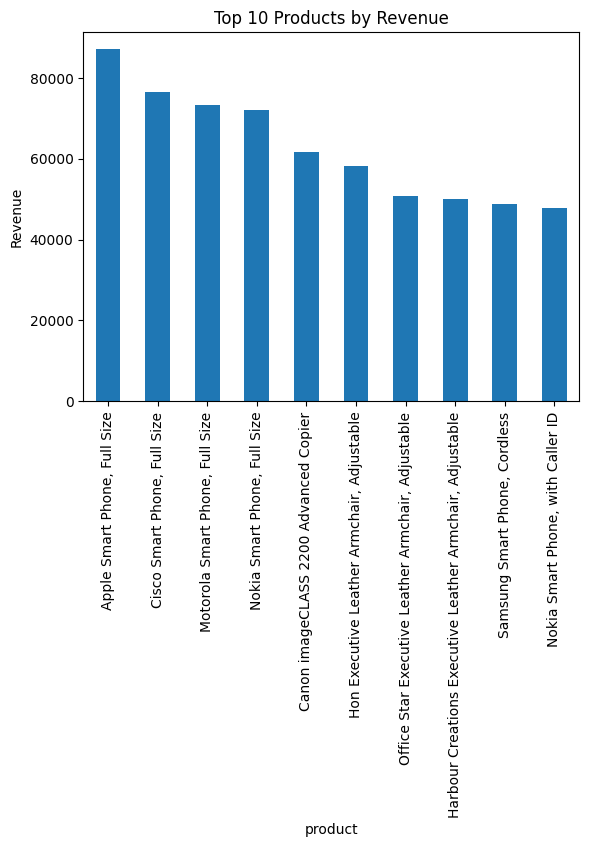

In [14]:
import matplotlib.pyplot as plt

df_summary.plot(kind='bar', x='product', y='revenue', legend=False)
plt.ylabel("Revenue")
plt.title("Top 10 Products by Revenue")
plt.tight_layout()
plt.show()


In [15]:
plt.savefig("sales_chart.png")
files.download("sales_chart.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [16]:
# Save before showing
plt.savefig("sales_chart.png", dpi=300, bbox_inches='tight')

# Display
plt.show()

# Download in Colab
from google.colab import files
files.download("sales_chart.png")


<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

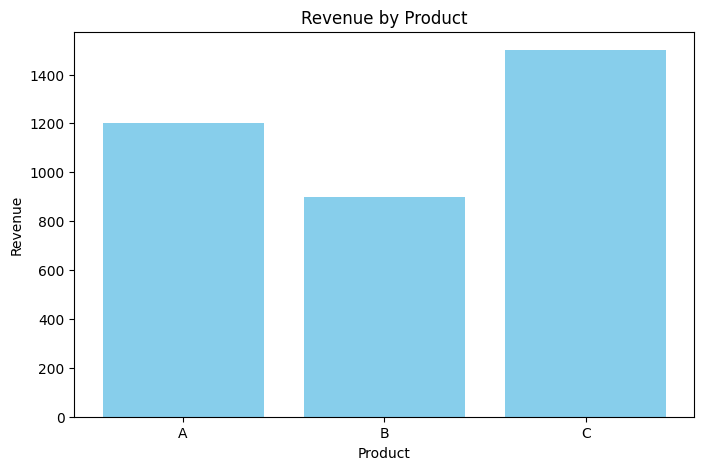

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import matplotlib.pyplot as plt

# Example data (replace with your df)
products = ["A", "B", "C"]
revenue = [1200, 900, 1500]

# Create figure
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(products, revenue, color='skyblue')

# Labels & title
ax.set_xlabel("Product")
ax.set_ylabel("Revenue")
ax.set_title("Revenue by Product")

# Save before plt.show()
plt.savefig("sales_chart.png", dpi=300, bbox_inches='tight')

# Show chart
plt.show()

# Download in Colab
from google.colab import files
files.download("sales_chart.png")
